In [1]:
import autosignals as sig
import fittingfunctions as fit
import adminfunctions as ad
import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy.optimize as op
%matplotlib inline

In [2]:
filelist = glob.glob("./spectra/*")
filelist

['./spectra/run562.txt',
 './spectra/116Sn_dp_18deg_600.asc',
 './spectra/run567.txt',
 './spectra/116Cd_p,d_17deg_b3.txt',
 './spectra/116Cd_d,p_10deg_b1.txt',
 './spectra/116Cd_d,p_31deg_b1.txt',
 './spectra/116Cd_d,p_40deg_b1.txt',
 './spectra/116Cd_h,a_10deg.txt',
 './spectra/116Cd_h,a_15deg.txt',
 './spectra/116Cd_h,a_20deg.txt']

reading  ./spectra/run562.txt
successfully read  ./spectra/run562.txt


"\nax.spines['left'].set_position('zero')\nax.spines['bottom'].set_position('zero')\nax.spines['top'].set_visible(False)\nax.spines['right'].set_visible(False)\n\nax.spines['left'].set_smart_bounds(True)\nax.spines['bottom'].set_smart_bounds(True)\n\nax.spines['top'].set_smart_bounds(True)\nax.spines['right'].set_smart_bounds(True)\n"

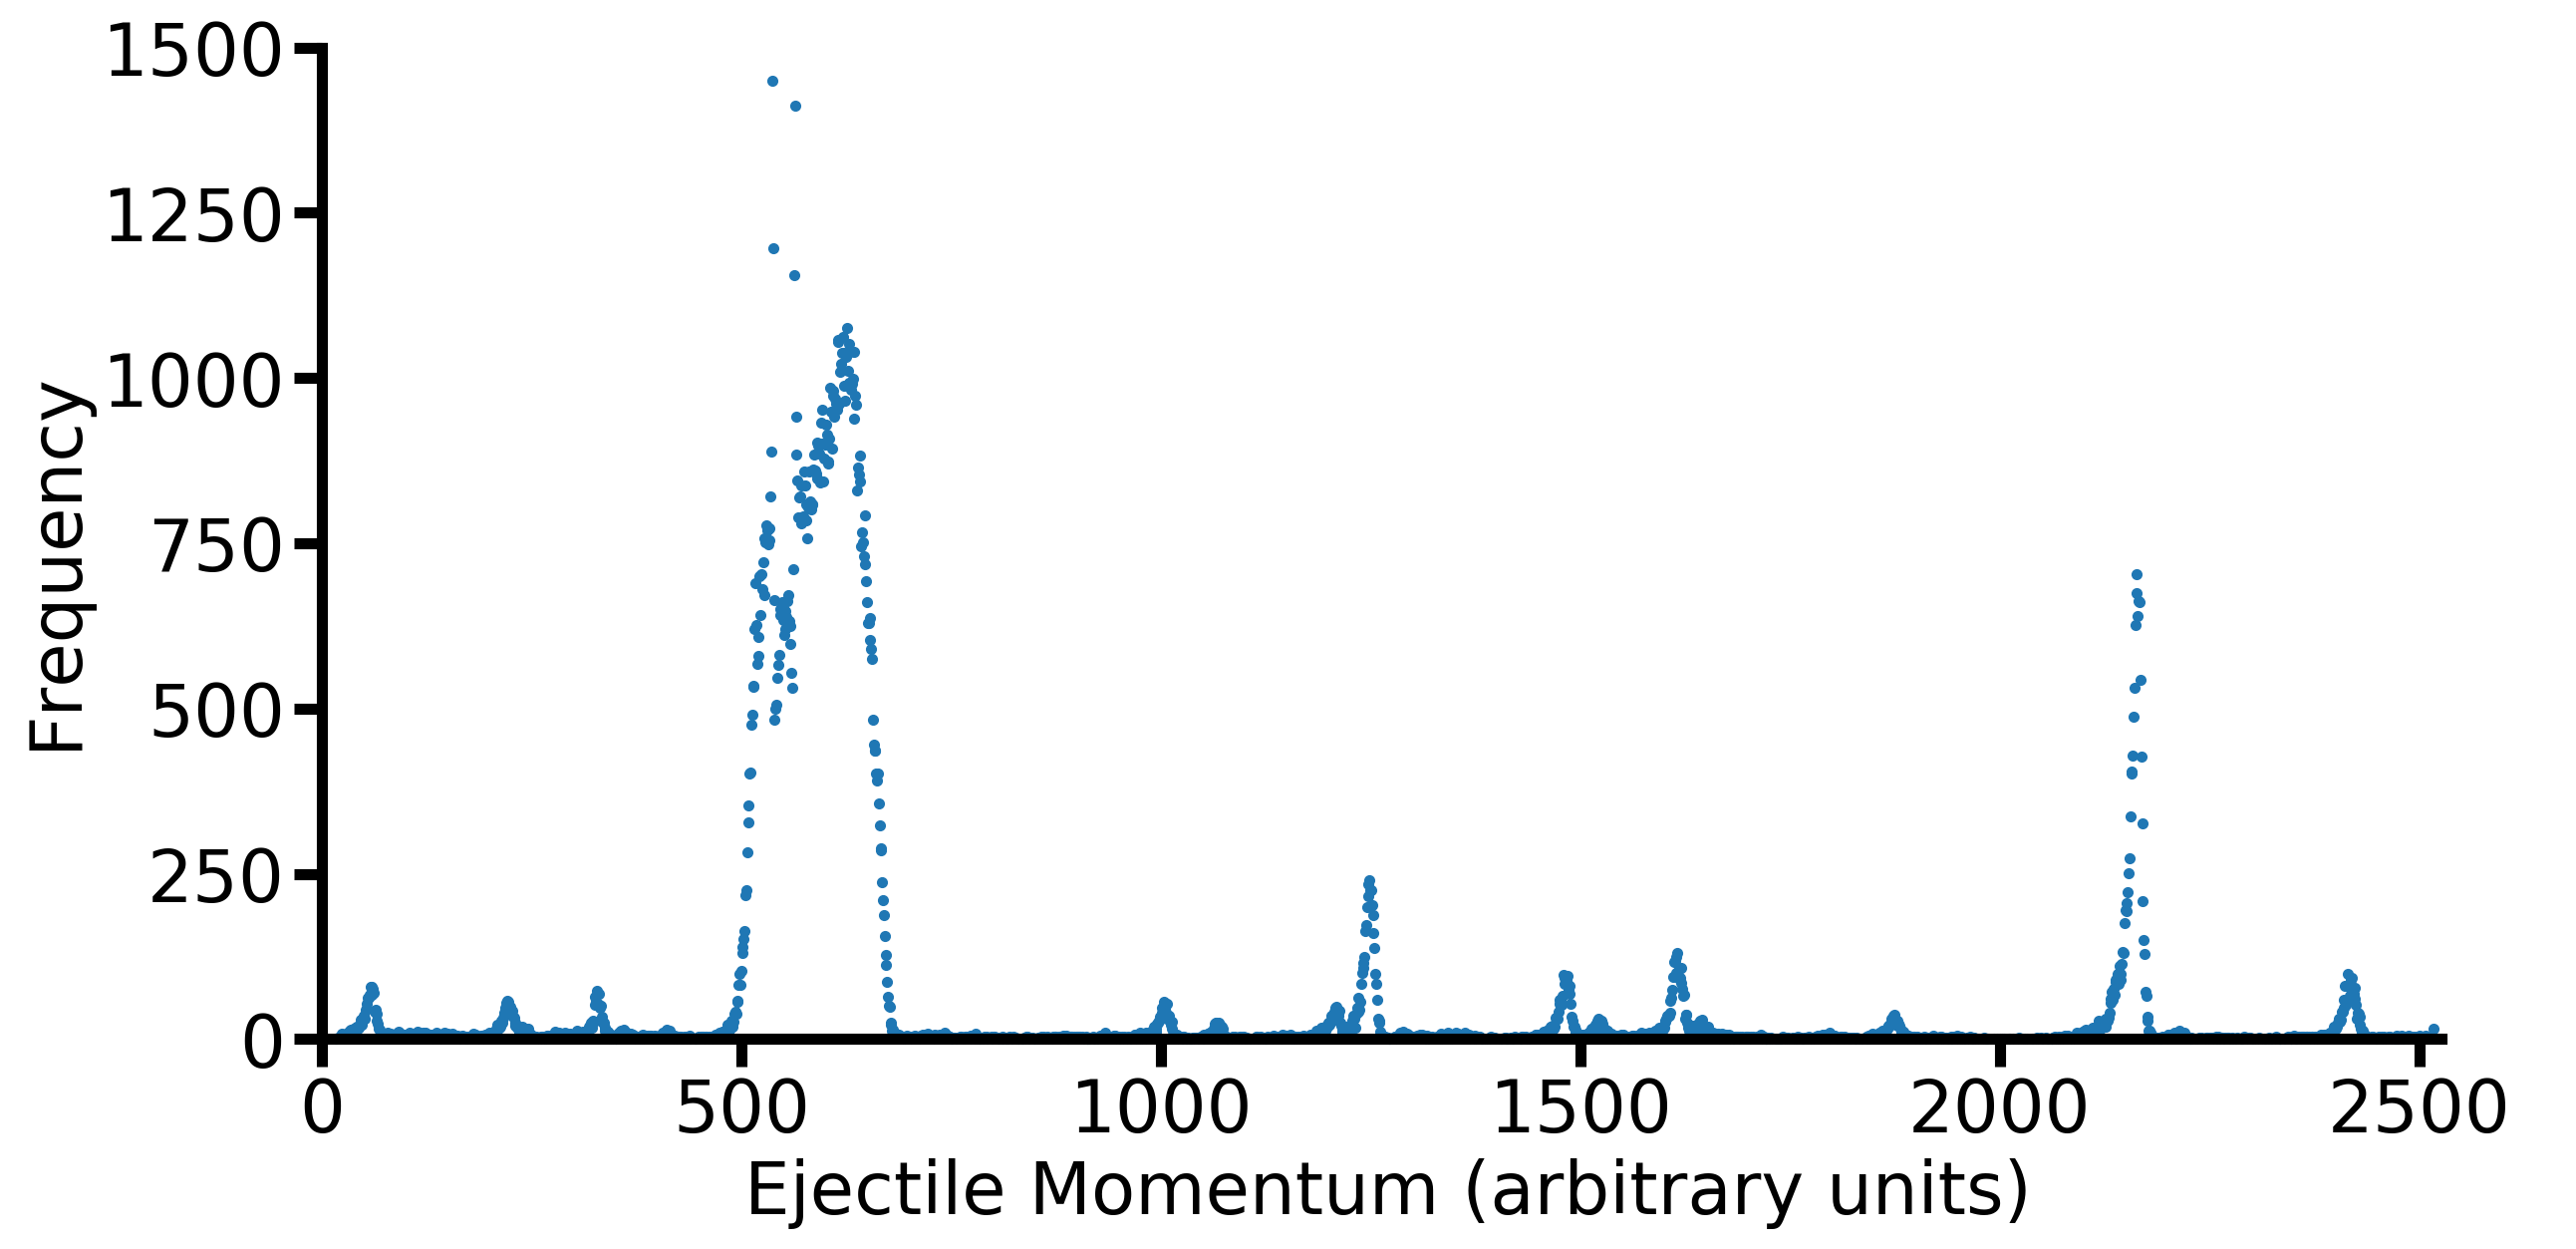

In [77]:
plt.rc('xtick.major', width = 4, size = 10)
plt.rc('ytick.major', width = 4, size = 10)


file = filelist[0]
x, y = ad.file_reader(file)
fig, ax, = plt.subplots(figsize = (15,7), dpi = 200)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

ax.set_xlabel('Ejectile Momentum (arbitrary units)', fontsize = 26)
ax.set_ylabel('Frequency', fontsize = 26)
ax.tick_params(axis="both", labelsize=26)
ax.scatter(x,y, marker = '.')

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)

fig.savefig('scatter.png')


'''
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
''''''
ax.spines['top'].set_smart_bounds(True)
ax.spines['right'].set_smart_bounds(True)
'''

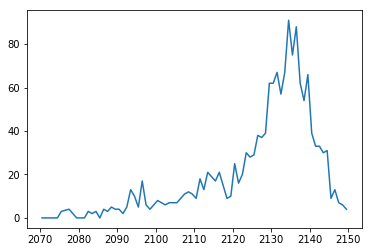

In [4]:
lb = 2070
ub = 2150
y = y[(x < ub) & (x > lb)]
y = y-np.full( len(y),1)
x = x[(x < ub) & (x > lb)]
plt.plot(x,y)

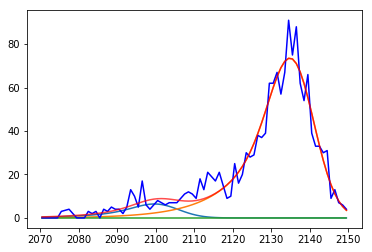

In [5]:
muarr = [ 2115.5,2140.5]
FWHM = 10
sig = FWHM/2.35
ft = fit.fit(x,y,muarr,sig,FWHM)#,r = 39,beta = 11, rbfix = True)

In [6]:
ad.printfit(ft, x, y)

/home/ben/Documents/autofit/autofit_script/adminfunctions.py:189: RuntimeWarning: divide by zero encountered in true_divide
  chi2 = np.sum((y - ymod)**2/y)
/home/ben/Documents/autofit/autofit_script/adminfunctions.py:222: RuntimeWarning: divide by zero encountered in log10
  errormag =  int(np.floor(np.log10(error))) #sets the precision of the uncertainty on the error. Rounds down on the order of magnitude
/home/ben/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


Fit complete. Fitted channels  2070.5  to  2149.5 , with  2  peak(s).
Width =  5.6 +- 0.4 
R =  50 +- 0 
Beta =  10 +- 0 
Background Gradient 0 +- 0 
Background Offset 0 +- 0 
Reduced chi-squared =  inf
Positions and yields:
[1] 2101 +- 3, 122 +- 26
[2] 2136.5 +- 0.3, 1402 +- 38
Press enter to continue


In [7]:
print(ft[1])

[   7.87224626 2101.32006614   90.22070821 2136.45903456    0.
    0.            5.56324633   50.           10.        ]


In [14]:
ft[5].savefig("h,a_2,4_doublet_20.png")

In [15]:
filelist

['./spectra/run562.txt',
 './spectra/116Sn_dp_18deg_600.asc',
 './spectra/run567.txt',
 './spectra/116Cd_p,d_17deg_b3.txt',
 './spectra/116Cd_d,p_10deg_b1.txt',
 './spectra/116Cd_d,p_31deg_b1.txt',
 './spectra/116Cd_d,p_40deg_b1.txt',
 './spectra/116Cd_h,a_10deg.txt',
 './spectra/116Cd_h,a_15deg.txt',
 './spectra/116Cd_h,a_20deg.txt']

In [28]:
file = filelist[-3]
x, y = ad.file_reader(file, delete_0 = False)

reading  ./spectra/116Cd_h,a_10deg.txt
successfully read  ./spectra/116Cd_h,a_10deg.txt


In [29]:
y

array([32.,  3.,  1., ...,  1.,  1.,  1.])

In [30]:
np.sum(y) - y[0]

5966.0

In [70]:
pwd

'/home/ben/Documents/autofit/autofit_script'